In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
data = pd.read_csv('train.csv')
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
 data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [5]:
 data.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


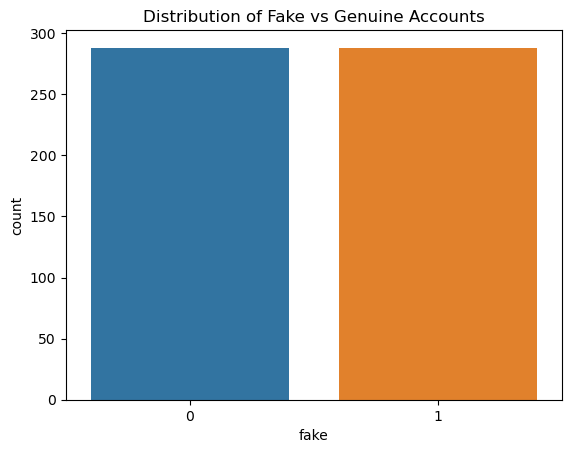

In [6]:
 sns.countplot(x='fake', data=data)
 plt.title("Distribution of Fake vs Genuine Accounts")
 plt.show()

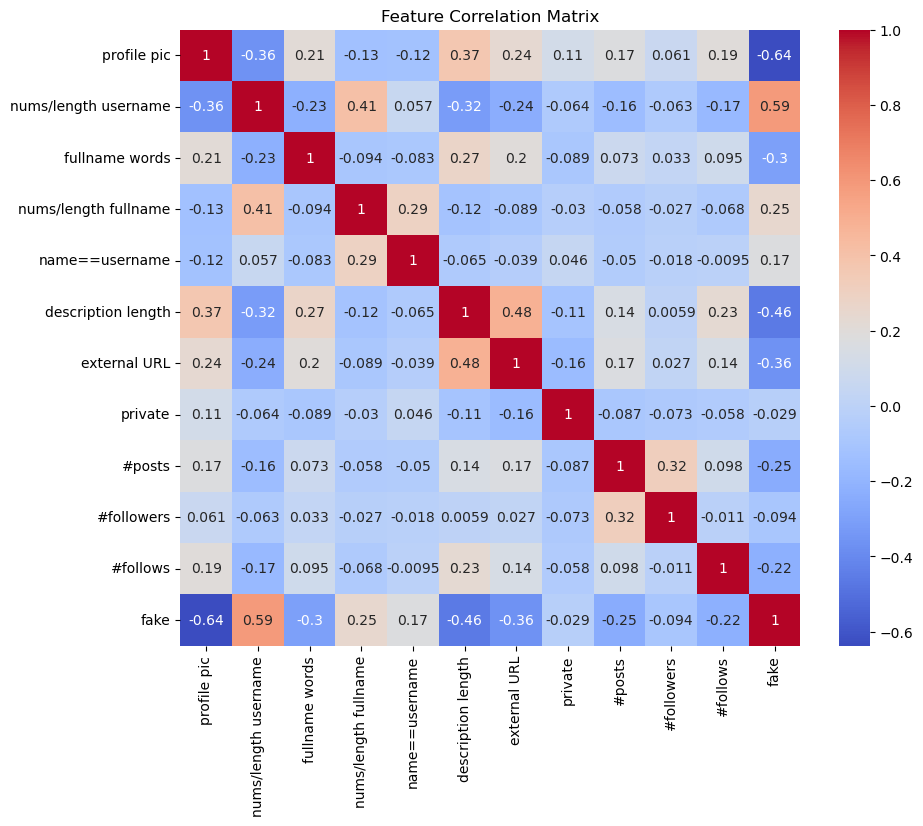

In [7]:
 # Correlation matrix
 correlation = data.corr()
 plt.figure(figsize=(10, 8))
 sns.heatmap(correlation, annot=True, cmap='coolwarm')
 plt.title("Feature Correlation Matrix")
 plt.show()

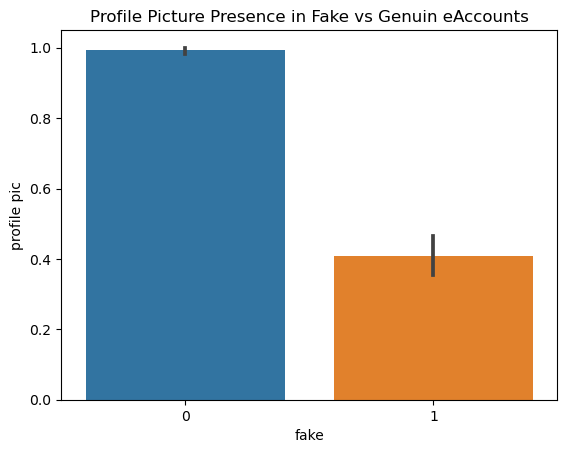

In [8]:
 sns.barplot(x='fake', y='profile pic', data=data)
 plt.title("Profile Picture Presence in Fake vs Genuin eAccounts")
 plt.show()

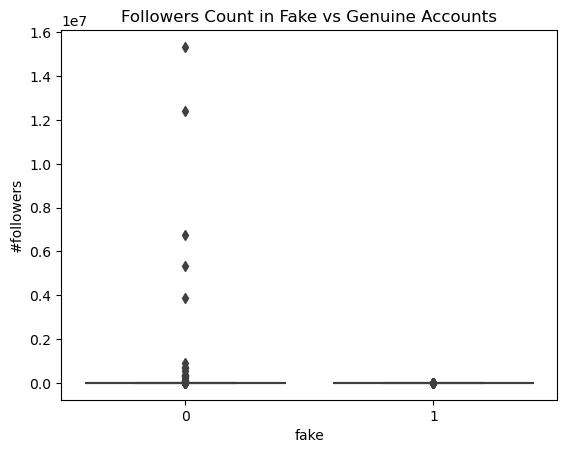

In [9]:
 sns.boxplot(x='fake', y='#followers', data=data)
 plt.title("Followers Count in Fake vs Genuine Accounts")
 plt.show()

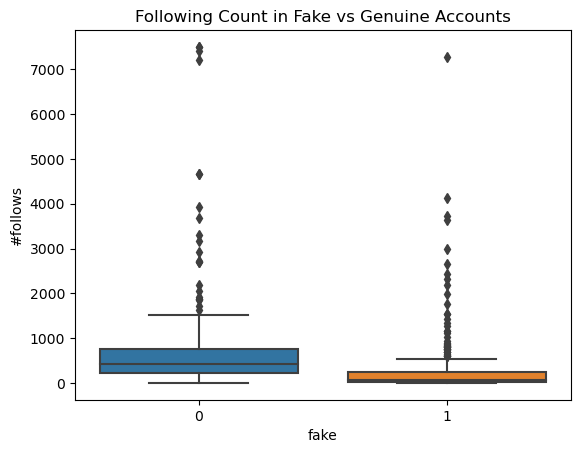

In [10]:
 sns.boxplot(x='fake', y='#follows', data=data)
 plt.title("Following Count in Fake vs Genuine Accounts")
 plt.show()

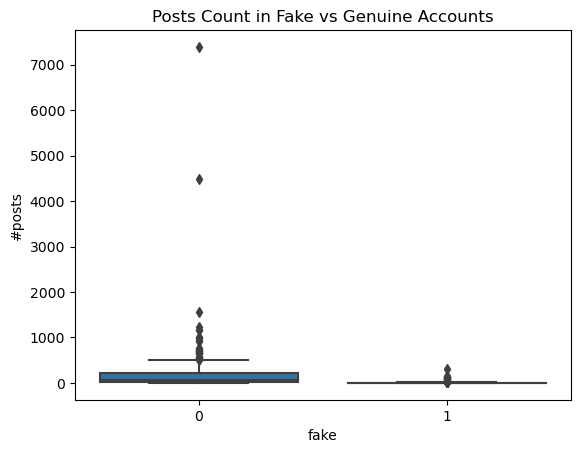

In [11]:
 sns.boxplot(x='fake', y='#posts', data=data)
 plt.title("Posts Count in Fake vs Genuine Accounts")
 plt.show()

In [12]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaled_features = scaler.fit_transform(data.drop('fake',axis=1))
 scaled_data = pd.DataFrame(scaled_features,columns=data.columns[:-1])
 scaled_data['fake'] = data['fake']
 scaled_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,0.65249,0.496299,-1.388312,-0.288723,-0.189661,0.806385,-0.362809,-0.786115,-0.187932,-0.092711,0.486945,0
1,0.65249,-0.765916,0.513395,-0.288723,-0.189661,0.567470,-0.362809,-0.786115,0.444404,-0.090797,0.026841,0
2,0.65249,-0.298429,0.513395,-0.288723,-0.189661,-0.600561,-0.362809,1.272078,-0.235233,-0.093636,-0.447437,0
3,0.65249,-0.765916,-0.437459,-0.288723,-0.189661,1.576224,-0.362809,-0.786115,1.422782,-0.093355,0.155496,0
4,0.65249,-0.765916,0.513395,-0.288723,-0.189661,-0.600561,-0.362809,1.272078,-0.252659,-0.093644,-0.416909,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.65249,1.805263,-0.437459,3.230943,-0.189661,-0.600561,-0.362809,-0.786115,-0.185443,-0.093628,0.095529,1
572,0.65249,1.010535,-0.437459,2.351027,-0.189661,-0.043091,-0.362809,-0.786115,-0.158058,-0.093738,-0.472514,1
573,0.65249,1.898761,0.513395,-0.288723,-0.189661,-0.600561,-0.362809,-0.786115,-0.257638,-0.093705,-0.184676,1
574,0.65249,1.898761,-0.437459,-0.288723,-0.189661,-0.308553,-0.362809,-0.786115,-0.267597,-0.093748,-0.474694,1


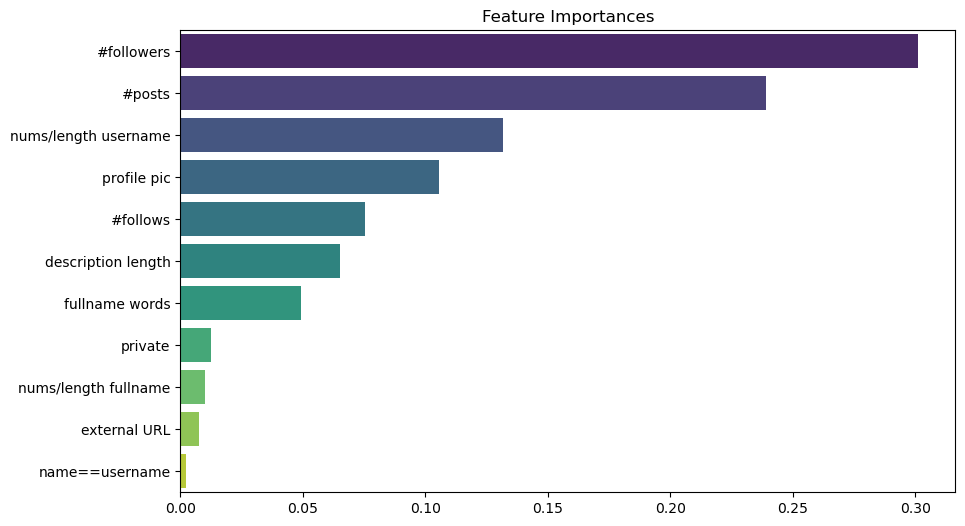

In [13]:
 X = scaled_data.drop('fake', axis=1)
 y = scaled_data['fake']
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=42)
 # Build Random Forest Model
 model = RandomForestClassifier(n_estimators=100,
 random_state=42)
 model.fit(X_train, y_train)
 # Feature Importance Plot
 importances = model.feature_importances_
 indices = np.argsort(importances)[::-1]
 plt.figure(figsize=(10, 6))
 plt.title("Feature Importances")
 sns.barplot(y=X.columns[indices], x=importances[indices],
 palette='viridis')
 plt.show()

In [14]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.95      0.90      0.92        80

    accuracy                           0.93       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173

Confusion Matrix:
 [[89  4]
 [ 8 72]]


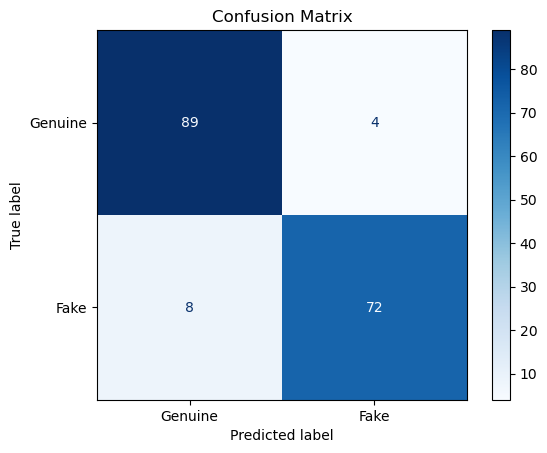

In [15]:
 from sklearn.metrics import ConfusionMatrixDisplay
 ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=['Genuine', 'Fake'], cmap='Blues')
 plt.title("Confusion Matrix")
 plt.show()

In [16]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import joblib



In [18]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [19]:
gs = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='f1', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
print("Best Params:", gs.best_params_)
print("Best F1 Score:", gs.best_score_)

Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score: 0.9111839881328768


In [20]:
# Train the best Gradient Boosting Model
best_gb_model = gs.best_estimator_
best_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [21]:
y_pred_gb = best_gb_model.predict(X_test)


In [22]:
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        93
           1       0.95      0.91      0.93        80

    accuracy                           0.94       173
   macro avg       0.94      0.93      0.94       173
weighted avg       0.94      0.94      0.94       173

Gradient Boosting Confusion Matrix:
 [[89  4]
 [ 7 73]]
Gradient Boosting ROC AUC Score: 0.934744623655914


In [23]:
joblib.dump(best_gb_model, 'best_gradient_boosting_model.pkl')


['best_gradient_boosting_model.pkl']

In [24]:
loaded_model = joblib.load('best_gradient_boosting_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)

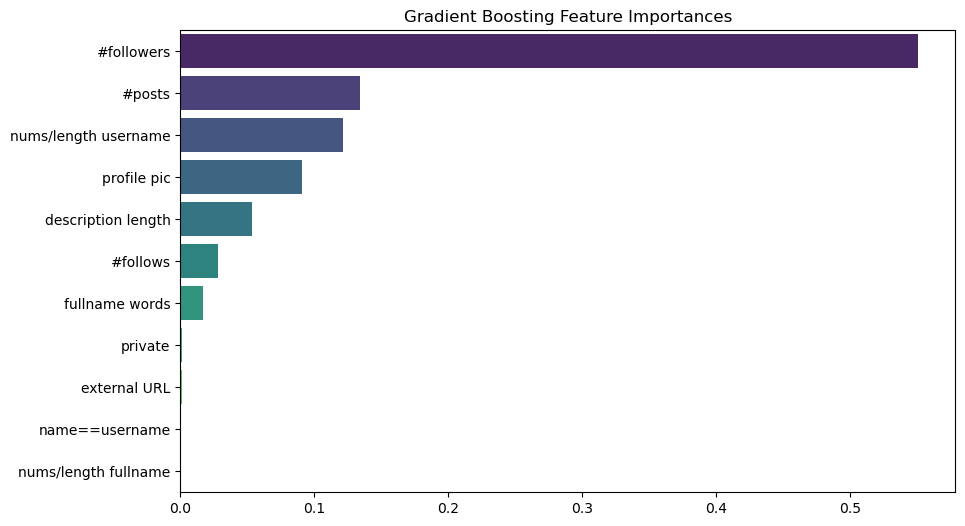

In [25]:
assert (y_pred_loaded == y_pred_gb).all()

importances = best_gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
sns.barplot(y=X.columns[indices], x=importances[indices], palette='viridis')
plt.show()